<a href="https://colab.research.google.com/github/Emutisya/ML-Assignmentd/blob/main/Feature_Selection_Group_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LassoCV, Lasso
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense
import matplotlib.pyplot as plt






# Get The DataSet

In [65]:
data=pd.read_csv('/content/drive/MyDrive/ML_TASKS/Housing Pricing.csv')

View first 3 rows

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500


check how the dataset looks like


In [68]:
data.shape

(1460, 77)

1460 rows & 77 columns


In [69]:
data.drop('Id',inplace=True,axis=1)

drop Id

In [70]:
data.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500


In [71]:
list(data.columns)

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch

view all columns

In [72]:
original_features=list(data.columns)

In [73]:
original_features

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch

# **FIND FEATURES WITH MISSING VALUES**

In [74]:
data.isnull().any()

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool

Those with true have missing values

In [75]:
features_with_missing_values=list(data.columns[data.isnull().any()])

Filter the specific columns with missing values

In [76]:
features_with_missing_values

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [77]:
len(features_with_missing_values)

15

There are 15 features with missing values

In [78]:
len(original_features)

76

We had 76 original features

**FILL IN FEATURES WITH MISSING VALUES**

In [79]:
for feature in features_with_missing_values:
  print(feature,' ',data[feature].isna().sum())

LotFrontage   259
MasVnrType   8
MasVnrArea   8
BsmtQual   37
BsmtCond   37
BsmtExposure   38
BsmtFinType1   37
BsmtFinType2   38
Electrical   1
FireplaceQu   690
GarageType   81
GarageYrBlt   81
GarageFinish   81
GarageQual   81
GarageCond   81


check the total number of missing values in each feature 

In [80]:
for feature in features_with_missing_values:
  print(feature,' ',data[feature].isna().sum()/len(data)*100,' ',data[feature].dtype)

LotFrontage   17.73972602739726   float64
MasVnrType   0.547945205479452   object
MasVnrArea   0.547945205479452   float64
BsmtQual   2.5342465753424657   object
BsmtCond   2.5342465753424657   object
BsmtExposure   2.6027397260273974   object
BsmtFinType1   2.5342465753424657   object
BsmtFinType2   2.6027397260273974   object
Electrical   0.0684931506849315   object
FireplaceQu   47.26027397260274   object
GarageType   5.5479452054794525   object
GarageYrBlt   5.5479452054794525   float64
GarageFinish   5.5479452054794525   object
GarageQual   5.5479452054794525   object
GarageCond   5.5479452054794525   object


check the total number of missing values in each feature in %

***used filling methods = backward fill & mean fill:***

In [81]:
bfill,mean_fill=[],[]

In [82]:
for feature in features_with_missing_values:
  print(feature,' ',data[feature].isna().sum()/len(data)*100,' ',data[feature].dtype)
  
  if data[feature].dtype=='float64':
    mean_fill.append(feature)
  else:
    bfill.append(feature)
   
   

   

LotFrontage   17.73972602739726   float64
MasVnrType   0.547945205479452   object
MasVnrArea   0.547945205479452   float64
BsmtQual   2.5342465753424657   object
BsmtCond   2.5342465753424657   object
BsmtExposure   2.6027397260273974   object
BsmtFinType1   2.5342465753424657   object
BsmtFinType2   2.6027397260273974   object
Electrical   0.0684931506849315   object
FireplaceQu   47.26027397260274   object
GarageType   5.5479452054794525   object
GarageYrBlt   5.5479452054794525   float64
GarageFinish   5.5479452054794525   object
GarageQual   5.5479452054794525   object
GarageCond   5.5479452054794525   object


In [83]:
mean_fill

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [84]:
bfill

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [85]:
for feature in mean_fill:
  data[feature].fillna(data[feature].mean(),inplace=True)



In [86]:
for feature in bfill:
  data[feature].fillna(method='bfill',inplace=True)



Data is filled for both the float datatypes and objects

In [87]:
data.columns[data.isna().any()]

Index(['FireplaceQu'], dtype='object')

still found one column with missing values

In [88]:
data['FireplaceQu'].isna().sum()

2

Has two values missing

In [89]:
data['FireplaceQu'].fillna(method='ffill',inplace=True)

In [90]:
data['FireplaceQu'].isna().sum()

0

# **ENCODING THE DATASET**

In [91]:
categorial_features=list(data.select_dtypes(include=['object']).columns)

In [92]:
categorial_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [93]:
numerical=list(set(original_features)-set(categorial_features))

In [94]:
numerical

['MiscVal',
 '3SsnPorch',
 'LotArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'BsmtUnfSF',
 'TotRmsAbvGrd',
 'HalfBath',
 'PoolArea',
 'BsmtFullBath',
 'YearBuilt',
 'MoSold',
 'GarageCars',
 'MasVnrArea',
 'WoodDeckSF',
 'LotFrontage',
 'YearRemodAdd',
 'BedroomAbvGr',
 'MSSubClass',
 '2ndFlrSF',
 'OverallCond',
 'SalePrice',
 'Fireplaces',
 'EnclosedPorch',
 'ScreenPorch',
 'OpenPorchSF',
 'BsmtFinSF1',
 'LowQualFinSF',
 'FullBath',
 'GrLivArea',
 'KitchenAbvGr',
 'BsmtHalfBath',
 'GarageYrBlt',
 'OverallQual',
 'GarageArea',
 'YrSold',
 'BsmtFinSF2']

In [95]:
nominal=['MSZoning','LandContour','Neighborhood']
ordinal=list(set(categorial_features)-set(nominal))

In [96]:
target=['SalePrice']

In [97]:
df_nominal=pd.get_dummies(data[nominal])

In [98]:
df_nominal

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1456,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1457,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1458,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Encode Ordinal using categorial encoding

In [99]:
for feature in ordinal:
  data[feature]=data[feature].astype('category').cat.codes

df_ordinal=data[ordinal]


In [100]:
data[numerical]

,MiscVal,3SsnPorch,LotArea,TotalBsmtSF,1stFlrSF,BsmtUnfSF,TotRmsAbvGrd,HalfBath,PoolArea,BsmtFullBath,YearBuilt,MoSold,GarageCars,MasVnrArea,WoodDeckSF,LotFrontage,YearRemodAdd,BedroomAbvGr,MSSubClass,2ndFlrSF,OverallCond,SalePrice,Fireplaces,EnclosedPorch,ScreenPorch,OpenPorchSF,BsmtFinSF1,LowQualFinSF,FullBath,GrLivArea,KitchenAbvGr,BsmtHalfBath,GarageYrBlt,OverallQual,GarageArea,YrSold,BsmtFinSF2
0,0,0,8450,856,856,150,8,1,0,1,2003,2,2,196.0,0,65.0,2003,3,60,854,5,208500,0,0,0,61,706,0,2,1710,1,0,2003.0,7,548,2008,0
1,0,0,9600,1262,1262,284,6,0,0,0,1976,5,2,0.0,298,80.0,1976,3,20,0,8,181500,1,0,0,0,978,0,2,1262,1,1,1976.0,6,460,2007,0
2,0,0,11250,920,920,434,6,1,0,1,2001,9,2,162.0,0,68.0,2002,3,60,866,5,223500,1,0,0,42,486,0,2,1786,1,0,2001.0,7,608,2008,0
3,0,0,9550,756,961,540,7,0,0,1,1915,2,3,0.0,0,60.0,1970,3,70,756,5,140000,1,272,0,35,216,0,1,1717,1,0,1998.0,7,642,2006,0
4,0,0,14260,1145,1145,490,9,1,0,1,2000,12,3,350.0,192,84.0,2000,4,60,1053,5,250000,1,0,0,84,655,0,2,2198,1,0,2000.0,8,836,2008,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,7917,953,953,953,7,1,0,0,1999,8,2,0.0,0,62.0,2000,3,60,694,5,175000,1,0,0,40,0,0,2,1647,1,0,1999.0,6,460,2007,0
1456,0,0,13175,1542,2073,589,7,0,0,1,1978,2,2,119.0,349,85.0,1988,3,20,0,6,210000,2,0,0,0,790,0,2,2073,1,0,1978.0,6,500,2010,163
1457,2500,0,9042,1152,1188,877,9,0,0,0,1941,5,1,0.0,0,66.0,2006,4,70,1152,9,266500,2,0,0,60,275,0,2,2340,1,0,1941.0,7,252,2010,0
1458,0,0,9717,1078,1078,0,5,0,0,1,1950,4,1,0.0,366,68.0,1996,2,20,0,6,142125,0,112,0,0,49,0,1,1078,1,0,1950.0,5,240,2010,1029


Note: Objective is to form a new dataset with all the new changes

In [101]:
new_data=pd.concat([df_nominal,df_ordinal,data[numerical]],axis=1)

In [102]:
new_data.shape

(1460, 107)

Dataset is Encoded


# **STANDARDIZING THE DATA**

In [103]:
new_data.drop('SalePrice',axis=1,inplace=True)

In [104]:
x=new_data.to_numpy()

In [105]:
x

array([[   0.,    0.,    0., ...,  548., 2008.,    0.],
       [   0.,    0.,    0., ...,  460., 2007.,    0.],
       [   0.,    0.,    0., ...,  608., 2008.,    0.],
       ...,
       [   0.,    0.,    0., ...,  252., 2010.,    0.],
       [   0.,    0.,    0., ...,  240., 2010., 1029.],
       [   0.,    0.,    0., ...,  276., 2008.,  290.]])

In [106]:
x[0]

array([0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 2.000e+00,
       3.000e+00, 4.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 4.000e+00,
       2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 3.000e+00, 4.000e+00,
       2.000e+00, 4.000e+00, 1.200e+01, 2.000e+00, 4.000e+00, 2.000e+00,
       4.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 8.000e+00, 0.000e+00,
       1.000e+00, 3.000e+00, 0.000e+00, 1.300e+01, 6.000e+00, 5.000e+00,
       5.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       8.450e+03, 8.560e+02, 8.560e+02, 1.500e+02, 8.000e+00, 1.000e+00,
       0.000e+00, 1.000e+00, 2.003e+03, 2.000e+00, 

In [107]:
x=StandardScaler().fit_transform(x)

In [108]:
x[0]

array([-0.08304548, -0.21585871, -0.10526316,  0.51813339, -0.41895507,
       -0.21235968, -0.18831089, -0.15899968,  0.33712564, -0.10854037,
       -0.03703704, -0.10526316, -0.20339487, -0.1398323 ,  2.95522137,
       -0.19025216, -0.27116307, -0.23917551, -0.16124951, -0.10854037,
       -0.1863522 , -0.42683279, -0.07875671, -0.22941573, -0.16998114,
       -0.23595776, -0.28963792, -0.13199092, -0.23106504, -0.20521398,
       -0.25018188, -0.13199092, -0.16347148, -0.08712888,  0.22403433,
       -0.77797579,  0.28780036,  0.303692  ,  0.83559903, -0.88465767,
       -1.23804229,  0.60466978,  0.28974476, -0.12579688, -0.29055229,
       -0.41169079,  0.64046232,  1.11993319, -0.40936914,  0.2085023 ,
        0.74309239, -0.40779461,  0.18797343, -0.03174026,  0.36420746,
        0.26381257, -0.71775144, -0.12304604,  0.31386709, -0.02618016,
       -0.49151573,  0.75073056, -0.22571613,  0.75162623,  0.25597761,
        0.30941909,  1.02668924, -0.23012211, -0.03628912,  0.06

In [109]:
y=data[target]

In [110]:
y=y.to_numpy()
y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [111]:
y.shape

(1460, 1)

y is now a vector

In [112]:
y=StandardScaler().fit_transform(y)


In [113]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

# **FEATURE SELECTION USING L1**

In [114]:
lasso_cv=Lasso()
lasso_cv.fit(x,y)

#lsvc=LinearSVC(C=0.02, penalty="l1", dual=False).fit(x,y.ravel())lsvc=LinearSVC(C=0.02, penalty="l1", dual=False).fit(x,y.ravel())
#model= SelectFromModel(lsvc, prefit=True)
#x_new=model.transform(x)
#x_new.shape

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Feature Selection using lasso

**Split the dataset**

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [116]:
x_train.shape

(1022, 106)

# **MODEL TRAINING USING SEEP FEED FORWARD ANN**

In [121]:
epochs=200
model=Sequential()
model.add(Dense(24, activation='relu'))
model.add(Dense(14, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(Adam(learning_rate=0.01),loss="mse")

history=model.fit(x_train, y_train, verbose=1, epochs=epochs)


Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.6709
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.1585
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0950
Epoch 4/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0760
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0587
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0668
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0564
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0460
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0368
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0448
Epoch 11/200
32/32 [==============================] - 0s 1ms/step - loss: 0.0350
Epoch 12/200
32/32 [==============================] - 0s 1ms/step - loss: 0.1099
Epoch 13/200
32/32 [=================

checking loss rate

In [118]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 24)                2568      
_________________________________________________________________
dense_5 (Dense)              (None, 14)                350       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 120       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 3,047
Trainable params: 3,047
Non-trainable params: 0
_________________________________________________________________


In [120]:
model.predict(x_test)

array([[-0.62501854],
       [-0.25110823],
       [-0.5905774 ],
       [ 1.4044175 ],
       [-0.6778582 ],
       [-1.0678589 ],
       [-1.280878  ],
       [-0.388399  ],
       [-0.6098823 ],
       [-1.3501483 ],
       [ 0.37676927],
       [-0.33395642],
       [-0.34362227],
       [ 0.98868185],
       [ 0.74912876],
       [-0.4487391 ],
       [ 0.10332897],
       [-0.39133072],
       [-1.3020437 ],
       [ 0.867944  ],
       [ 0.05924273],
       [-1.2939345 ],
       [-0.71208596],
       [ 2.0605724 ],
       [ 2.3147678 ],
       [ 0.90535164],
       [ 0.44238502],
       [ 0.50909483],
       [-0.45317   ],
       [-0.45887536],
       [-0.91144407],
       [-0.14498289],
       [-0.5988306 ],
       [ 0.46163392],
       [ 0.9251524 ],
       [-0.81831664],
       [-0.9007921 ],
       [ 3.9142215 ],
       [-0.94673026],
       [ 0.29065537],
       [ 1.0373454 ],
       [-0.8346548 ],
       [-0.77689373],
       [-0.34007382],
       [ 2.5141997 ],
       [ 1

In [126]:
historydf=pd.DataFrame(history.history, index=history.epoch)
historydf.head()


,loss
0,0.447925
1,0.155801
2,0.100721
3,0.084895
4,0.071746


In [127]:
final_loss=historydf['loss'].to_numpy()[-1]


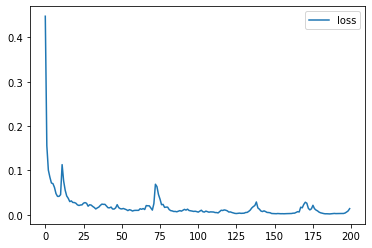

In [128]:
historydf.plot()



Loss is reducing